# Ordenamiento de *Clientes Potenciales*.

Se ha consolidado la Información desde el 2019 al 2022, de las vistas realizadas por las consultoras.

**El proyecto pretende ordenar los clientes en orden de mayor probabilidad de Compra.**

![Logo Nutriendo](imagenes/logo_nutriendo.png)

## Código

### [https://github.com/cajivar/BootCamp_Proyecto2023_CF](https://github.com/cajivar/BootCamp_Proyecto2023_CF)

## Dataset

Este dataset es propiedad de Laboratorios Nutriendo SAS [Clientes Visitados Data Set]



## Solución  

La empresa tiene información de clientes anteriores que en algún momento han sido contactados en el pasado comprar la inversión en el pasado sin importar si lo compraron o no. Esta información está contenida en el archivo `train.csv`.

Así mismo, para ayudarte hay un archivo llamado `test.csv` con datos de otros clientes pero que deberás usar para probar tus resultados.

**Como no tenemos más información más allá de si un cliente compró o no compró, vamos a utilizar las probabilidades que nos de un modelo de clasificación para decidir quién tiene más probabilidades de convertir**.

Este problema se conoce como *lead scoring*.

### Descripción de los datos

| Variable     | Definición                                                              |
|--------------|-------------------------------------------------------------------------|
| *ID*         | Identificador tabla                                         |
| *Empresa*        | Edad del cliente                                                        |
| *Nombre*        | Nombre del cliente                                        |
| *Sexo*    | Sexo del cliente                                              |
| *Fec_Nac*  | Fecha Nacimiento del cliente                                          |
| *Identificacion*    | Numero documento identidad                      |
| *telefono*    | Telefono contacto del cliente                                        |
| *Company*    | Empresa de trabajo de la visita al cliente                    |
| *Job*       | Ocupación del cliente                         |
| *Email*    | correo electronico del cliente                |
| *Addres*      | Direccion residencia del cliente                                 |
| *Comentario*        | Observaciones de Salu del Cliente                                 |
| *Height*   | Altura del cliente                                    |
| *Weight*   | Peso del cliente |
| *IMC*      | Indice de Masa Muscular Calculado            |
| *Estado*   | Clasificacion segun el IMC del cliente   |
| *Result*   | Observaciones de la prueba del scanner |
| *Fecha* | Feha de la Prueba    |
| *Edad* | Edad del cliente    |
| *Compra* | Si el cliente compro como resultado de la campaña    |
| *Año* | Año de la visita    |


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [24]:
df = pd.read_csv('./data/Data_Nut_2019-2022.csv')

In [25]:
df

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
0,1,ACROPOLIS,JULY TATIANA APARICIO SEPULVEDA,Femenino,4/09/1993,1098746059,3134308590,SANTANDER BUCARAMANGA,ANALISTA DE CETECCION,tatiana-9324@hotmail.com,...,163,53,19.9,bajo peso,Peso corporal estándar,4,15/01/2019,25,SI,2019
1,2,ACROPOLIS,LUIS EVELIO GARCIA ACOSTA,Masculino,28/10/1964,91752482,3124227618,SEGURIDAD ACROPOLIS,VIGILANTE,luiseve@hotmail.com,...,164,72,26.8,Sobrepeso,Grasa parcial severa,6,15/01/2019,54,SI,2019
2,3,ACROPOLIS,GERMAN FERNANDO PARRA,Masculino,6/04/1982,91508362,3177014657,SEGURIDAD ACROPOLIS,TECNICO MEDIOS TECNOLOGICOS,gfpc06@hotmail.com,...,165,71,26.1,Sobrepeso,Peso corporal estándar,6,15/01/2019,36,NO,2019
3,4,ACROPOLIS,BREICY JASBLEIDY CHIGUARA,Femenino,20/08/1983,93878669,3214802273,SANTANDER,OFICIOS GENERALES,BREICUJASBELIDYCHIGUANA@GMAIL.COM,...,152,93,40.3,Obesidad Morbida,Grasa parcial severa,4,15/01/2019,35,NO,2019
4,5,ACROPOLIS,julio cesar galvis,Masculino,26/08/1988,37874511,3125694228,santander,NaN,NaN,...,170,70,24.2,normal,Ligeramente por encima del peso normal,4,15/01/2019,30,NO,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47322,47323,DOMICILIARIA 29/12/2022,DEYBI MERCHAN,Masculino,4/09/1974,91476749,3143599901,TA 109/64MMHG FC67,ACESOR COMERCIAL,deybi.merchan@esab.com.co,...,180,87,26.9,Sobrepeso,Grasa parcial severa,9,8/01/2023,48,SI,2022
47323,47324,DOMICILIARIA 29/12/2022,YADIS HERNANDEZ CONTRERAS,Femenino,16/04/1974,63463542,3125898384,TA 132/67MMHG FC69,AMA DE CASA,NaN,...,159,86,34.0,Obesidad_1,Grasa parcial severa,9,8/01/2023,48,NO,2022
47324,47325,DOMICILIARIA 30/12/2022,JOHANA ARENAS,Femenino,13/05/1988,1094829015,3185294134,TA 108/68MMHG FC68,CONTADORA,johanarenas1305@gmail.com,...,152,55,23.8,normal,Ligeramente por encima del peso normal,9,8/01/2023,34,SI,2022
47325,47326,DOMICILIARIA 31122022,CRISTHIAN ALEXANDER BARAJAS,Masculino,21/07/1992,1098724539,3134290742,TA 159/91MMHG FC58,CONDUCTOR,cristhianbaragas2107@gmail.com,...,176,133,42.9,Obesidad Morbida,Grasa parcial severa,9,8/01/2023,30,SI,2022


In [26]:
df.dtypes

ID                  int64
Empresa            object
Nombre             object
Sexo               object
Fec_Nac            object
Identificacion     object
telefono           object
Company            object
Job                object
Email              object
Address            object
Comentario         object
Height              int64
Weight              int64
IMC               float64
Estado             object
Result             object
Consultor           int64
Fecha              object
Edad                int64
Compra             object
Año                 int64
dtype: object

In [27]:
print(df.shape)
print(type(df.shape))

(47327, 22)
<class 'tuple'>


In [28]:
df['Compra'].unique()

array(['SI', 'NO'], dtype=object)

In [29]:
df['telefono'] = df['telefono'].astype('object')
df['Company'] = df['Company'].astype('object')

In [30]:
df

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
0,1,ACROPOLIS,JULY TATIANA APARICIO SEPULVEDA,Femenino,4/09/1993,1098746059,3134308590,SANTANDER BUCARAMANGA,ANALISTA DE CETECCION,tatiana-9324@hotmail.com,...,163,53,19.9,bajo peso,Peso corporal estándar,4,15/01/2019,25,SI,2019
1,2,ACROPOLIS,LUIS EVELIO GARCIA ACOSTA,Masculino,28/10/1964,91752482,3124227618,SEGURIDAD ACROPOLIS,VIGILANTE,luiseve@hotmail.com,...,164,72,26.8,Sobrepeso,Grasa parcial severa,6,15/01/2019,54,SI,2019
2,3,ACROPOLIS,GERMAN FERNANDO PARRA,Masculino,6/04/1982,91508362,3177014657,SEGURIDAD ACROPOLIS,TECNICO MEDIOS TECNOLOGICOS,gfpc06@hotmail.com,...,165,71,26.1,Sobrepeso,Peso corporal estándar,6,15/01/2019,36,NO,2019
3,4,ACROPOLIS,BREICY JASBLEIDY CHIGUARA,Femenino,20/08/1983,93878669,3214802273,SANTANDER,OFICIOS GENERALES,BREICUJASBELIDYCHIGUANA@GMAIL.COM,...,152,93,40.3,Obesidad Morbida,Grasa parcial severa,4,15/01/2019,35,NO,2019
4,5,ACROPOLIS,julio cesar galvis,Masculino,26/08/1988,37874511,3125694228,santander,NaN,NaN,...,170,70,24.2,normal,Ligeramente por encima del peso normal,4,15/01/2019,30,NO,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47322,47323,DOMICILIARIA 29/12/2022,DEYBI MERCHAN,Masculino,4/09/1974,91476749,3143599901,TA 109/64MMHG FC67,ACESOR COMERCIAL,deybi.merchan@esab.com.co,...,180,87,26.9,Sobrepeso,Grasa parcial severa,9,8/01/2023,48,SI,2022
47323,47324,DOMICILIARIA 29/12/2022,YADIS HERNANDEZ CONTRERAS,Femenino,16/04/1974,63463542,3125898384,TA 132/67MMHG FC69,AMA DE CASA,NaN,...,159,86,34.0,Obesidad_1,Grasa parcial severa,9,8/01/2023,48,NO,2022
47324,47325,DOMICILIARIA 30/12/2022,JOHANA ARENAS,Femenino,13/05/1988,1094829015,3185294134,TA 108/68MMHG FC68,CONTADORA,johanarenas1305@gmail.com,...,152,55,23.8,normal,Ligeramente por encima del peso normal,9,8/01/2023,34,SI,2022
47325,47326,DOMICILIARIA 31122022,CRISTHIAN ALEXANDER BARAJAS,Masculino,21/07/1992,1098724539,3134290742,TA 159/91MMHG FC58,CONDUCTOR,cristhianbaragas2107@gmail.com,...,176,133,42.9,Obesidad Morbida,Grasa parcial severa,9,8/01/2023,30,SI,2022


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Compra'])

In [33]:
print(df_train.shape)
print(type(df_train.shape))
df_train.head()

(33128, 22)
<class 'tuple'>


,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
9095,9096,INMEL ESSA OPERATIVO,JUAN CAMILO GONZALEZ BUENO,Masculino,21/12/1991,1102549087,3133619190,SANTANDER BUCARAMANGA,OPERATIVO - PODADOR,juankmilogonzalez009@gmail.com,...,163,77,29.0,Sobrepeso,Grasa parcial severa,1,15/06/2019,27,NO,2019
9383,9384,CENTRO DE SALUD PARAMO ADM,OLGA LUCIA CELIS VESGA,Femenino,12/05/1984,28285142,3107955094,SANT PARAMO,ADM-AUX ADM,olgaluciacelisv@gmail.com,...,160,56,21.9,normal,Peso corporal estándar,8,15/06/2019,35,NO,2019
30728,30729,SANSESOL OPERATIVO,EDINSON ESPINAL,Masculino,9/03/1988,109865032,3225131983,138/73 FC 75,356,espinel_844@hotmail.com,...,175,92,30.0,Obesidad_1,Grasa parcial severa,3,13/07/2021,33,SI,2021
47167,47168,RESTAURANTE ASIP ADMINISTRATIVO 15122022,FABIO ZARATE,Masculino,2/09/1962,91258820,3184620555,TA 108/63MMHG FC69,GERENTE,sinammon_123@hotmail.com,...,168,78,27.6,Sobrepeso,Grasa parcial severa,9,20/12/2022,60,SI,2022
2805,2806,FRESKALECHE COMERCIALES CUCUTA,DIANA CAROLINA ORTIZ,Femenino,31/07/1985,60448358,3212043303,NORTE DE SANTANDER CUCUTA,MERCADERISTA,carolinaortiz2731@gmail.com,...,153,65,27.8,Sobrepeso,Grasa parcial severa,10,15/02/2019,33,NO,2019


In [34]:
print(df_test.shape)
print(type(df_test.shape))
df_test.head()

(14199, 22)
<class 'tuple'>


,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
31818,31819,REAL MOTOS COMERCIAL BUCARAMANGA,ADRIANA LUCIA ARDILA SANTOS,Femenino,21/10/1985,1098606112,3232348084,T/A: 105/71 MMHG FC: 69,362,aluci@hotmail.com,...,160,66,25.8,Sobrepeso,Grasa parcial severa,6,19/08/2021,35,NO,2021
5977,5978,ORIENTAL DE TRANSPORTES,LUIS CARLOS LIZCANO SANGUINO,Masculino,29/06/1982,91514231,3164995501,santander,CONDUCTOR,lizcanocarlos21@gmail.com,...,184,128,37.8,Obesidad_2,Grasa parcial severa,9,15/04/2019,36,NO,2019
1517,1518,COLEGIO CAMPESTRE GOYAVIER,LUZ ALBA MURILLO PINZON,Femenino,4/05/1972,49659989,3209664197,SANTANDER,SERVICIOS GENERALES,NaN,...,172,103,34.8,Obesidad_1,Grasa parcial severa,7,15/01/2019,46,NO,2019
46985,46986,GRUPO JAVA OPT 30-11-22,CARLOS ALBERTO JAIMES BUENO,Masculino,6/05/1986,1098614456,3156110731,T/A 145/73MMHG - FC 91,DIRECTOR JURIDICO,NaN,...,187,106,30.3,Obesidad_1,Grasa parcial severa,1,6/12/2022,36,NO,2022
6407,6408,PENSIONES Y CESANTIAS,diana cristina aguilarbarrientos,Femenino,1/02/1986,NaN,3206938607,NaN,proteccion,diana.aguilar@proteccion.com.co,...,167,78,28.0,Sobrepeso,Peso corporal estándar,3,15/04/2019,33,NO,2019


In [35]:
df_train.info()
df_train.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33128 entries, 9095 to 642
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              33128 non-null  int64  
 1   Empresa         33128 non-null  object 
 2   Nombre          33128 non-null  object 
 3   Sexo            33128 non-null  object 
 4   Fec_Nac         33128 non-null  object 
 5   Identificacion  31758 non-null  object 
 6   telefono        33128 non-null  object 
 7   Company         31917 non-null  object 
 8   Job             32553 non-null  object 
 9   Email           25742 non-null  object 
 10  Address         27153 non-null  object 
 11  Comentario      27709 non-null  object 
 12  Height          33128 non-null  int64  
 13  Weight          33128 non-null  int64  
 14  IMC             33128 non-null  float64
 15  Estado          33128 non-null  object 
 16  Result          33092 non-null  object 
 17  Consultor       33128 non-null

ID                  int64
Empresa            object
Nombre             object
Sexo               object
Fec_Nac            object
Identificacion     object
telefono           object
Company            object
Job                object
Email              object
Address            object
Comentario         object
Height              int64
Weight              int64
IMC               float64
Estado             object
Result             object
Consultor           int64
Fecha              object
Edad                int64
Compra             object
Año                 int64
dtype: object

In [36]:
df_train.sample(5)

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
10787,10788,FISCALIA CUCUTA ADMINISTRATIVO,JESUS ANTONIO HERNANDEZ GARCIA,Masculino,6/12/1960,13451424,3138465483,NORTE DE SANTANDER,PROFESIONAL DE GESTION II,jesus.hernandezc@fiscalia.gov.co,...,168,88,31.2,Obesidad_1,Grasa parcial severa,13,15/07/2019,58,NO,2019
32906,32907,MADOCO ADMINISTRATIVO BARRANCA,CRISTIAN ELIAS SILVA ARIAS,Masculino,8/05/1998,1096247677,3008981813,T/A 127/89MMHG FC: 103,364,cristiansilva_02@hotmail.com,...,183,72,21.5,normal,Peso corporal estándar,1,13/09/2021,23,NO,2021
29000,29001,METROCINCO,YEZID FLOREZ SALAMANCA,Masculino,2/05/1989,1098671130,3184009811,JEFE DE BODEGA,363,yezidflorezsalamanca@gmail.com,...,182,75,22.6,normal,Peso corporal estándar,13,30/04/2021,31,NO,2021
29110,29111,MAQUINOBRA DE CILOMBIA ADMINISTRATIVO,DORIS DIAS CELIS,Femenino,19/12/1982,63545313,3007801912,SUPERVISORA SST,36,NaN,...,165,88,32.3,Obesidad_1,Grasa parcial severa,3,30/04/2021,38,SI,2021
36496,36497,ALCALDIA DE GIRON ADMNISTRATIVO 19/11/2021,SARA MARIA PEÑALOZA CALENTURA,Femenino,19/03/1977,28150690,3017204207,T/A: 123/79 MMHG FC: 67,356,saharasmp@yahoo.com,...,156,52,21.4,normal,Peso corporal estándar,6,23/11/2021,44,NO,2021


In [37]:
print(df_train.shape)
print(type(df_train.shape))

(33128, 22)
<class 'tuple'>


In [38]:
from pandas_profiling import ProfileReport
import seaborn as sns

In [39]:
profile = ProfileReport(df_train, title='Analisis de Compras sin Procesar', explorative=True)
profile.to_file('reporte_visitas.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\cajiv\OneDrive\env_python\cienciadatos\Proyecto_Final\PF\BootCamp_Proyecto2023_CF\env\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Distribución de la Variable Compra\nNo: 21573 (65.12%) | Si: 11555 (34.88%) ')

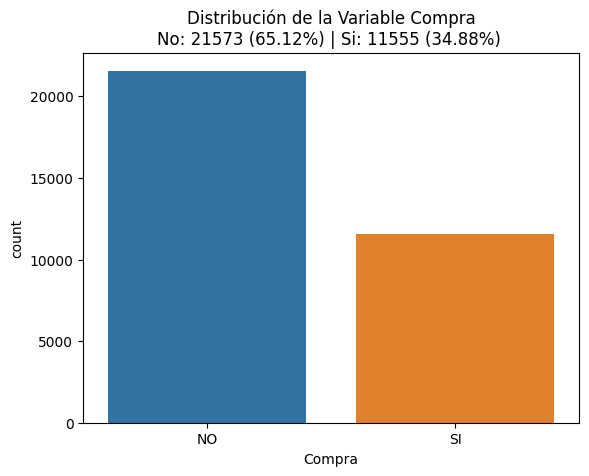

In [40]:
%matplotlib inline

compra_proportion = (df_train['Compra'].value_counts()).to_dict()
ax = sns.countplot(x=df_train["Compra"])
title = ("Distribución de la Variable Compra\n"
    f"No: {compra_proportion['NO']} ({(compra_proportion['NO']/len(df_train)):0.2%}) |"
    f" Si: {compra_proportion['SI']} ({(compra_proportion['SI']/len(df_train)):0.2%}) " )
ax.set_title(title)




In [41]:
df_train.drop(['ID'], axis='columns', inplace=True)
df_train.drop(['Company'], axis='columns', inplace=True)
df_train.drop(['Job'], axis='columns', inplace=True)
df_train.drop(['Comentario'], axis='columns', inplace=True)


In [42]:
df_train = df_train.drop(df_train[df_train['Height']>210].index)
df_train = df_train.drop(df_train[df_train['Height']<120].index)
df_train = df_train.drop(df_train[df_train['Weight']>140].index)
df_train = df_train.drop(df_train[df_train['Weight']<30].index)

feature engineering

In [43]:
df_train

,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Email,Address,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
9095,INMEL ESSA OPERATIVO,JUAN CAMILO GONZALEZ BUENO,Masculino,21/12/1991,1102549087,3133619190,juankmilogonzalez009@gmail.com,CRA 8 # 104A-14 4 PISO PORVENIR,163,77,29.0,Sobrepeso,Grasa parcial severa,1,15/06/2019,27,NO,2019
9383,CENTRO DE SALUD PARAMO ADM,OLGA LUCIA CELIS VESGA,Femenino,12/05/1984,28285142,3107955094,olgaluciacelisv@gmail.com,CR 6-4-20,160,56,21.9,normal,Peso corporal estándar,8,15/06/2019,35,NO,2019
30728,SANSESOL OPERATIVO,EDINSON ESPINAL,Masculino,9/03/1988,109865032,3225131983,espinel_844@hotmail.com,SPO2 97%,175,92,30.0,Obesidad_1,Grasa parcial severa,3,13/07/2021,33,SI,2021
47167,RESTAURANTE ASIP ADMINISTRATIVO 15122022,FABIO ZARATE,Masculino,2/09/1962,91258820,3184620555,sinammon_123@hotmail.com,CLL 65 # 44 - 12 APT 602 LA FLORESTA,168,78,27.6,Sobrepeso,Grasa parcial severa,9,20/12/2022,60,SI,2022
2805,FRESKALECHE COMERCIALES CUCUTA,DIANA CAROLINA ORTIZ,Femenino,31/07/1985,60448358,3212043303,carolinaortiz2731@gmail.com,CALLE 23 # 4 A 27 PORTAL DE LOS ALCACERES,153,65,27.8,Sobrepeso,Grasa parcial severa,10,15/02/2019,33,NO,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16472,ALCA COMERCIAL BUCARAMANGA,GERARDO ARIZA TIRADA,Masculino,9/12/1963,91229395,3102619110,k15.alcaltda@gmail.com,CALLE 104#40-35 SAN BERNARDO FLORDABLANCA,167,70,25.1,Sobrepeso,Ligeramente por encima del peso normal,1,15/11/2019,56,NO,2019
46903,MATA DEL CAFE OPERATIVO 17112022,OMAR AGUSTO,Masculino,25/03/1964,91233373,3173826591,NaN,CLL 44 # 18 - 37 RINCON DE GIRON,168,74,26.2,Sobrepeso,Ligeramente por encima del peso normal,9,29/11/2022,58,NO,2022
24299,DOMICILIARIOS,ALEIDA PEREZ JIMENEZ,Femenino,15/05/1993,1102371556,316516710,aleidaperezjimenez012@gmail.com,CALLE 42 1 OCCIDENTE 12,152,63,27.3,Sobrepeso,Grasa parcial severa,5,24/11/2020,27,NO,2020
40106,ZONA FRANCA PLANTA ADMINISTRATIVO 10-05-22,SILVIA JULIANA SANCHEZ LOZANO,Femenino,23/12/1995,1098781041,3004341825,julianasanchez0629@gmail.com,NaN,165,66,24.2,normal,Ligeramente por encima del peso normal,5,18/05/2022,26,NO,2022


# One-Hot Encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder
estado_encoder = OneHotEncoder()

estado_encoder.fit(df_train[['Estado']])

OneHotEncoder()

In [45]:
encoded_estado = estado_encoder.transform(df_train[['Estado']])
encoded_estado.toarray()

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [46]:
encoded_estado = pd.DataFrame(encoded_estado.toarray(), columns=estado_encoder.categories_)
encoded_estado['original_value'] = df_train['Estado']
encoded_estado

,Obesidad Morbida,Obesidad_1,Obesidad_2,Sobrepeso,bajo peso,normal,original_value
0,0.0,0.0,0.0,1.0,0.0,0.0,bajo peso
1,0.0,0.0,0.0,0.0,0.0,1.0,Sobrepeso
2,0.0,1.0,0.0,0.0,0.0,0.0,Sobrepeso
3,0.0,0.0,0.0,1.0,0.0,0.0,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,normal
...,...,...,...,...,...,...,...
32975,0.0,0.0,0.0,1.0,0.0,0.0,normal
32976,0.0,0.0,0.0,1.0,0.0,0.0,Sobrepeso
32977,0.0,0.0,0.0,1.0,0.0,0.0,normal
32978,0.0,0.0,0.0,0.0,0.0,1.0,normal


# Binning

In [47]:
from custom_transformers import CutTransformer

In [48]:
edad_bin = CutTransformer(bins = [0, 20, 30, 40, 50, 60, 1000], as_str=True)

In [49]:
edad_frame = df_train[['Edad']].copy()
edad_bin.fit(edad_frame[['Edad']])

edad_encoded = edad_bin.fit_transform(edad_frame[['Edad']])
edad_frame['edad_encoded'] = edad_encoded

In [50]:
edad_frame

,Edad,edad_encoded
9095,27,"(20, 30]"
9383,35,"(30, 40]"
30728,33,"(30, 40]"
47167,60,"(50, 60]"
2805,33,"(30, 40]"
...,...,...
16472,56,"(50, 60]"
46903,58,"(50, 60]"
24299,27,"(20, 30]"
40106,26,"(20, 30]"


In [51]:
edad_one_hot_encoder = OneHotEncoder()

In [52]:
edad_one_hot_encoder.fit(edad_frame[['edad_encoded']])

OneHotEncoder()

In [53]:
edad_one_hot_encoder.transform(edad_frame[['edad_encoded']]).toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [54]:
oh_age = edad_one_hot_encoder.transform(edad_frame[['edad_encoded']]).toarray()

In [55]:
one_hot_encoded_edades = pd.DataFrame(
    oh_age,
    columns=edad_one_hot_encoder.categories_
)

In [56]:
pd.merge(edad_frame, one_hot_encoded_edades, left_index=True, right_index=True)

,Edad,edad_encoded,"((0, 20],)","((20, 30],)","((30, 40],)","((40, 50],)","((50, 60],)","((60, 1000],)"
9095,27,"(20, 30]",0.0,0.0,0.0,1.0,0.0,0.0
9383,35,"(30, 40]",0.0,0.0,1.0,0.0,0.0,0.0
30728,33,"(30, 40]",0.0,1.0,0.0,0.0,0.0,0.0
2805,33,"(30, 40]",0.0,0.0,0.0,1.0,0.0,0.0
3931,48,"(40, 50]",0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12439,43,"(40, 50]",0.0,1.0,0.0,0.0,0.0,0.0
1222,21,"(20, 30]",0.0,0.0,1.0,0.0,0.0,0.0
16472,56,"(50, 60]",0.0,0.0,1.0,0.0,0.0,0.0
24299,27,"(20, 30]",0.0,0.0,1.0,0.0,0.0,0.0


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
weight_scaler = StandardScaler()

In [59]:
weight_scaled = df_train[['Weight']].copy()

In [60]:
weight_scaled['weight_scaled'] = weight_scaler.fit_transform(weight_scaled[['Weight']])

In [61]:
weight_scaled

,Weight,weight_scaled
9095,77,0.295599
9383,56,-1.144897
30728,92,1.324525
47167,78,0.364194
2805,65,-0.527541
...,...,...
16472,70,-0.184566
46903,74,0.089814
24299,63,-0.664731
40106,66,-0.458946


## Convierte *"Masculino"* y *"Femenino"* a enteros

In [62]:
from custom_transformers import MasFemTransformer

mas_fem_transformer = MasFemTransformer()

In [63]:
sexo_frame = df_train[['Sexo']].copy()

In [64]:
sexo_frame[['sexo_mapeado']] = mas_fem_transformer.fit_transform(sexo_frame)

In [65]:
sexo_frame

,Sexo,sexo_mapeado
9095,Masculino,1
9383,Femenino,0
30728,Masculino,1
47167,Masculino,1
2805,Femenino,0
...,...,...
16472,Masculino,1
46903,Masculino,1
24299,Femenino,0
40106,Femenino,0


In [66]:
df_train

,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Email,Address,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
9095,INMEL ESSA OPERATIVO,JUAN CAMILO GONZALEZ BUENO,Masculino,21/12/1991,1102549087,3133619190,juankmilogonzalez009@gmail.com,CRA 8 # 104A-14 4 PISO PORVENIR,163,77,29.0,Sobrepeso,Grasa parcial severa,1,15/06/2019,27,NO,2019
9383,CENTRO DE SALUD PARAMO ADM,OLGA LUCIA CELIS VESGA,Femenino,12/05/1984,28285142,3107955094,olgaluciacelisv@gmail.com,CR 6-4-20,160,56,21.9,normal,Peso corporal estándar,8,15/06/2019,35,NO,2019
30728,SANSESOL OPERATIVO,EDINSON ESPINAL,Masculino,9/03/1988,109865032,3225131983,espinel_844@hotmail.com,SPO2 97%,175,92,30.0,Obesidad_1,Grasa parcial severa,3,13/07/2021,33,SI,2021
47167,RESTAURANTE ASIP ADMINISTRATIVO 15122022,FABIO ZARATE,Masculino,2/09/1962,91258820,3184620555,sinammon_123@hotmail.com,CLL 65 # 44 - 12 APT 602 LA FLORESTA,168,78,27.6,Sobrepeso,Grasa parcial severa,9,20/12/2022,60,SI,2022
2805,FRESKALECHE COMERCIALES CUCUTA,DIANA CAROLINA ORTIZ,Femenino,31/07/1985,60448358,3212043303,carolinaortiz2731@gmail.com,CALLE 23 # 4 A 27 PORTAL DE LOS ALCACERES,153,65,27.8,Sobrepeso,Grasa parcial severa,10,15/02/2019,33,NO,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16472,ALCA COMERCIAL BUCARAMANGA,GERARDO ARIZA TIRADA,Masculino,9/12/1963,91229395,3102619110,k15.alcaltda@gmail.com,CALLE 104#40-35 SAN BERNARDO FLORDABLANCA,167,70,25.1,Sobrepeso,Ligeramente por encima del peso normal,1,15/11/2019,56,NO,2019
46903,MATA DEL CAFE OPERATIVO 17112022,OMAR AGUSTO,Masculino,25/03/1964,91233373,3173826591,NaN,CLL 44 # 18 - 37 RINCON DE GIRON,168,74,26.2,Sobrepeso,Ligeramente por encima del peso normal,9,29/11/2022,58,NO,2022
24299,DOMICILIARIOS,ALEIDA PEREZ JIMENEZ,Femenino,15/05/1993,1102371556,316516710,aleidaperezjimenez012@gmail.com,CALLE 42 1 OCCIDENTE 12,152,63,27.3,Sobrepeso,Grasa parcial severa,5,24/11/2020,27,NO,2020
40106,ZONA FRANCA PLANTA ADMINISTRATIVO 10-05-22,SILVIA JULIANA SANCHEZ LOZANO,Femenino,23/12/1995,1098781041,3004341825,julianasanchez0629@gmail.com,NaN,165,66,24.2,normal,Ligeramente por encima del peso normal,5,18/05/2022,26,NO,2022


# pipline

In [67]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn import set_config

In [68]:
# One-Hot encode estado status
one_hot_encode_categoricals = ColumnTransformer([
    (
        'one_hot_encode', # Nombre de la transformación
        OneHotEncoder(), # Transformación a aplicar
        ["Estado", 'Result', 'Consultor', 'Año'] # Columnas involucradas
    )
])

In [69]:
# Bin and encode edad
bin_and_encode_edad_pipeline = Pipeline([
    ('bin_edad', CutTransformer(bins =  [0, 20, 30, 40, 50, 60, 1000], as_str=True)),
    ('encode_edad', OneHotEncoder()),
])

bin_and_encode_edad = ColumnTransformer([
    ('bin_and_encode_edad',
    bin_and_encode_edad_pipeline,
    ["Edad"])
])

In [70]:
# Scale weight
weight_scaled = ColumnTransformer([
    (
        'scale_weight', # Nombre de la transformación
        StandardScaler(), # Transformación a aplicar
        ["Weight"] # Columnas involucradas
    )
])

In [71]:
# Map sexo
map_sexo = ColumnTransformer([
    (
        'map_sexo', # Nombre de la transformación
        MasFemTransformer(), # Transformación a aplicar
        ["Sexo"] # Columnas involucradas
    )
])

In [72]:
passthrough = ColumnTransformer([
    (
        'passthrough',
        'passthrough',
        ['Height', "IMC", "Consultor"]
    )
])

In [73]:
# Ensambla todo el pipeline
feature_pipeline = Pipeline([
    (
        'features',
        FeatureUnion([
            ('one_hot_encode_categoricals', one_hot_encode_categoricals),
            ('bin_and_encode_edad', bin_and_encode_edad),
            ('scale_weight', weight_scaled),
            ('passthrough', passthrough),
            ('map_sexo', map_sexo),
        ])
    )
])

In [74]:
from sklearn import set_config

set_config(display="diagram")
feature_pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('one_hot_encode_categoricals',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(),
                                                                                  ['Estado',
                                                                                   'Result',
                                                                                   'Consultor',
                                                                                   'Año'])])),
                                                ('bin_and_encode_edad',
                                                 ColumnTransformer(transformers=[('bin_and_encode_edad',
                                                                                  Pipeline(steps=[('bin_edad',
                                                                                                   CutTransformer(bins=[0,
                                                                                                                        20,
                                                                                                                        30,
                                                                                                                        40,
                                                                                                                        50,
                                                                                                                        60,
                                                                                                                        1000])),
                                                                                                  ('encode_edad',
                                                                                                   OneHotEncoder())]),
                                                                                  ['Edad'])])),
                                                ('scale_weight',
                                                 ColumnTransformer(transformers=[('scale_weight',
                                                                                  StandardScaler(),
                                                                                  ['Weight'])])),
                                                ('passthrough',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['Height',
                                                                                   'IMC',
                                                                                   'Consultor'])])),
                                                ('map_sexo',
                                                 ColumnTransformer(transformers=[('map_sexo',
                                                                                  MasFemTransformer(),
                                                                                  ['Sexo'])]))]))])

In [75]:
feature_pipeline.fit(df_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('one_hot_encode_categoricals',
                                                 ColumnTransformer(transformers=[('one_hot_encode',
                                                                                  OneHotEncoder(),
                                                                                  ['Estado',
                                                                                   'Result',
                                                                                   'Consultor',
                                                                                   'Año'])])),
                                                ('bin_and_encode_edad',
                                                 ColumnTransformer(transformers=[('bin_and_encode_edad',
                                                                                  Pipeline(steps=[('bin_edad',
                                                                                                   CutTransformer(bins=[0,
                                                                                                                        20,
                                                                                                                        30,
                                                                                                                        40,
                                                                                                                        50,
                                                                                                                        60,
                                                                                                                        1000])),
                                                                                                  ('encode_edad',
                                                                                                   OneHotEncoder())]),
                                                                                  ['Edad'])])),
                                                ('scale_weight',
                                                 ColumnTransformer(transformers=[('scale_weight',
                                                                                  StandardScaler(),
                                                                                  ['Weight'])])),
                                                ('passthrough',
                                                 ColumnTransformer(transformers=[('passthrough',
                                                                                  'passthrough',
                                                                                  ['Height',
                                                                                   'IMC',
                                                                                   'Consultor'])])),
                                                ('map_sexo',
                                                 ColumnTransformer(transformers=[('map_sexo',
                                                                                  MasFemTransformer(),
                                                                                  ['Sexo'])]))]))])

In [76]:
feature_pipeline.transform(df_train)

<32980x43 sparse matrix of type '<class 'numpy.float64'>'
	with 313874 stored elements in Compressed Sparse Row format>

In [77]:
feature_pipeline.transform(df_train).toarray().shape

(32980, 43)

In [78]:
df_train

,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Email,Address,Height,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año
9095,INMEL ESSA OPERATIVO,JUAN CAMILO GONZALEZ BUENO,Masculino,21/12/1991,1102549087,3133619190,juankmilogonzalez009@gmail.com,CRA 8 # 104A-14 4 PISO PORVENIR,163,77,29.0,Sobrepeso,Grasa parcial severa,1,15/06/2019,27,NO,2019
9383,CENTRO DE SALUD PARAMO ADM,OLGA LUCIA CELIS VESGA,Femenino,12/05/1984,28285142,3107955094,olgaluciacelisv@gmail.com,CR 6-4-20,160,56,21.9,normal,Peso corporal estándar,8,15/06/2019,35,NO,2019
30728,SANSESOL OPERATIVO,EDINSON ESPINAL,Masculino,9/03/1988,109865032,3225131983,espinel_844@hotmail.com,SPO2 97%,175,92,30.0,Obesidad_1,Grasa parcial severa,3,13/07/2021,33,SI,2021
47167,RESTAURANTE ASIP ADMINISTRATIVO 15122022,FABIO ZARATE,Masculino,2/09/1962,91258820,3184620555,sinammon_123@hotmail.com,CLL 65 # 44 - 12 APT 602 LA FLORESTA,168,78,27.6,Sobrepeso,Grasa parcial severa,9,20/12/2022,60,SI,2022
2805,FRESKALECHE COMERCIALES CUCUTA,DIANA CAROLINA ORTIZ,Femenino,31/07/1985,60448358,3212043303,carolinaortiz2731@gmail.com,CALLE 23 # 4 A 27 PORTAL DE LOS ALCACERES,153,65,27.8,Sobrepeso,Grasa parcial severa,10,15/02/2019,33,NO,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16472,ALCA COMERCIAL BUCARAMANGA,GERARDO ARIZA TIRADA,Masculino,9/12/1963,91229395,3102619110,k15.alcaltda@gmail.com,CALLE 104#40-35 SAN BERNARDO FLORDABLANCA,167,70,25.1,Sobrepeso,Ligeramente por encima del peso normal,1,15/11/2019,56,NO,2019
46903,MATA DEL CAFE OPERATIVO 17112022,OMAR AGUSTO,Masculino,25/03/1964,91233373,3173826591,NaN,CLL 44 # 18 - 37 RINCON DE GIRON,168,74,26.2,Sobrepeso,Ligeramente por encima del peso normal,9,29/11/2022,58,NO,2022
24299,DOMICILIARIOS,ALEIDA PEREZ JIMENEZ,Femenino,15/05/1993,1102371556,316516710,aleidaperezjimenez012@gmail.com,CALLE 42 1 OCCIDENTE 12,152,63,27.3,Sobrepeso,Grasa parcial severa,5,24/11/2020,27,NO,2020
40106,ZONA FRANCA PLANTA ADMINISTRATIVO 10-05-22,SILVIA JULIANA SANCHEZ LOZANO,Femenino,23/12/1995,1098781041,3004341825,julianasanchez0629@gmail.com,NaN,165,66,24.2,normal,Ligeramente por encima del peso normal,5,18/05/2022,26,NO,2022


In [79]:

temp_train = pd.DataFrame(feature_pipeline.transform(df_train).toarray())
temp_train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.295599,163.0,29.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.144897,160.0,21.9,8.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.324525,175.0,30.0,3.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.364194,168.0,27.6,9.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.527541,153.0,27.8,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.184566,167.0,25.1,1.0,1.0
32976,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.089814,168.0,26.2,9.0,1.0
32977,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.664731,152.0,27.3,5.0,0.0
32978,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.458946,165.0,24.2,5.0,0.0


# Convertimos la variable objetivo compra a 0 y 1

In [80]:
compra_frame = df_train[['Compra']].copy()
compra_frame['encoded'] = np.where(compra_frame['Compra'] == 'SI', 1, 0)

compra_frame.head(10)

,Compra,encoded
9095,NO,0
9383,NO,0
30728,SI,1
47167,SI,1
2805,NO,0
3931,NO,0
43166,SI,1
30557,SI,1
18546,NO,0
24426,NO,0


In [81]:
training_target_encoded = np.where(compra_frame['Compra'] == 'SI', 1, 0)

In [82]:
training_target_encoded

array([0, 0, 1, ..., 0, 0, 0])

## Machine Learning - Entrenamiento del modelo

In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [86]:
search_pipeline = Pipeline([
    ('feature_pipeline', feature_pipeline),
    ('model', XGBClassifier())
])

In [87]:
param_grid = {
    "model__n_estimators": [100, 200, 300],
    'model__max_depth': [4, 5, 6],
    'model__subsample': [0.5, 1],
    'model__scale_pos_weight': [1, 7.5],
    'model__eta': [0.01, 0.1, 0.2, 0.3]
}
search = GridSearchCV(search_pipeline, param_grid, n_jobs=-1, scoring='precision')
_ = search.fit(df_train, training_target_encoded)

In [88]:
# ?XGBClassifier

In [89]:
best_params = {key[7:]:value for key, value in search.best_params_.items()}
print("Best parameters:", best_params)
print(f"Best score: {search.best_score_:0.3%}")

Best parameters: {'eta': 0.01, 'max_depth': 4, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.5}
Best score: 58.520%


In [90]:
search.best_params_


{'model__eta': 0.01,
 'model__max_depth': 4,
 'model__n_estimators': 200,
 'model__scale_pos_weight': 1,
 'model__subsample': 0.5}

## Reentrena el mejor modelo con los mejores parámetros

In [91]:
inference_pipeline = Pipeline([
    ('feature_pipeline', feature_pipeline),
    ('model', XGBClassifier(**best_params))
])
_ = inference_pipeline.fit(df_train, training_target_encoded)

In [92]:
predicciones = inference_pipeline.predict(df_train)

In [93]:
predicciones

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix

In [95]:


def evaluate(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    print(confusion_matrix(y_true, y_pred))

    print(f"R: {recall:0.2%} A: {accuracy:0.2%} P: {precision:0.2%}")

In [96]:
evaluate(training_target_encoded, predicciones)

[[21379    91]
 [11303   207]]
R: 1.80% A: 65.45% P: 69.46%


## Evaluando con los datos de prueba

In [97]:
predicciones_test = inference_pipeline.predict(df_test)
predicciones_test

evaluate(np.where(df_test['Compra'] == 'SI', 1, 0), predicciones_test)

[[9192   55]
 [4877   75]]
R: 1.51% A: 65.27% P: 57.69%


In [98]:
df_test['Compra'].value_counts()

NO    9247
SI    4952
Name: Compra, dtype: int64

## Guardando todo el pipeline

In [99]:
import pickle

with open("lead_scoring.pickle", "wb") as wb:
    pickle.dump(inference_pipeline, wb)

## ¿Y el lead scoring?

In [100]:
with open("lead_scoring.pickle", "rb") as rb:
    lead_scoring = pickle.load(rb)

 > ℹ️ `predict_proba` regresa un arreglo de tamaño *(n_samples, n_classes)*, en donde las clases están dadas en el orden dictado por `lead_scoring.classes_`

In [101]:
probabilidades = lead_scoring.predict_proba(df_test)
valores =pd.DataFrame(probabilidades)
valores['pred'] = predicciones_test
valores

,0,1,pred
0,0.624088,0.375912,0
1,0.564020,0.435980,0
2,0.590021,0.409979,0
3,0.615389,0.384611,0
4,0.688729,0.311271,0
...,...,...,...
14194,0.712883,0.287118,0
14195,0.646770,0.353230,0
14196,0.703327,0.296673,0
14197,0.608642,0.391358,0


In [102]:
lead_scoring.classes_

array([0, 1])

In [103]:
df_test['score'] = probabilidades[:, 1]

In [104]:
df_test[["ID", "score"]].sort_values('score', ascending=False)

,ID,score
24378,24379,0.587304
21188,21189,0.572842
23392,23393,0.569254
20586,20587,0.563034
21506,21507,0.555894
...,...,...
2124,2125,0.199981
6634,6635,0.197630
6276,6277,0.197587
6636,6637,0.196955


In [105]:
df_test['score'] = probabilidades[:, 1]

In [106]:
dbcompra = df_test.sort_values('score', ascending=False)

In [107]:
dbcompra

,ID,Empresa,Nombre,Sexo,Fec_Nac,Identificacion,telefono,Company,Job,Email,...,Weight,IMC,Estado,Result,Consultor,Fecha,Edad,Compra,Año,score
24378,24379,SERVIENTREGA ADM FORIDA 2,MADELEINE SANTOS PEÑA,Femenino,14/05/1978,37543753,3177415680,LIDER REGIONAL,358,madelane.santos@darayuda.comco,...,68,30.2,Obesidad_1,Grasa parcial severa,6,24/11/2020,42,NO,2020,0.587304
21188,21189,RUITOQUE GOLF COUNTRY OPERATIVO BUCARAMANGA,MARIBEL UYABAN DIAZ,Femenino,28/01/1979,28151605,3166268299,SANTANDER BUCARAMNAGA RUITOQUE,CAJERA,maribelud@hotmail.com,...,72,30.8,Obesidad_1,Grasa parcial severa,6,10/03/2020,41,SI,2020,0.572842
23392,23393,SECOIN OPERATIVO BARRANCA,IRMA GONZALEZ MOLANO,Femenino,6/05/1976,63468028,3118353065,SERVICIOS GENERALES,361,irmagomo1976.mayo@gmail.com,...,66,29.3,Sobrepeso,Grasa parcial severa,8,23/10/2020,44,SI,2020,0.569254
20586,20587,SACEITES ADMINISTRATIVO GIRON,SANDRA REY GONZALEZ,Femenino,26/02/1981,28154946,3223477374,SANTANDER GIRON SACEITES,COORDINAODRA ADM,sandra.rey28@hotmail.com,...,70,29.9,Obesidad_1,Grasa parcial severa,6,24/02/2020,38,SI,2020,0.563034
21506,21507,MR CHERRY ADMINISTRATIVOS BUCARAMANGA,ANA LEDY ANGARITA ROSO,Femenino,28/08/1963,63303421,3017587090,SANTANDER,AUX CONTABLE,me-di-ar@hotmail.com,...,65,28.9,Sobrepeso,Grasa parcial severa,10,1/10/2020,57,SI,2020,0.555894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,2125,DANDRE RESTAURANT,LILIBETH PAEZ JULIO,Femenino,15/03/1996,NaN,3203932837,DEANDRE RESTAURANT,AUXILIAR DE CAJA,lilybpaez@gmail.com,...,61,25.4,Sobrepeso,Grasa parcial severa,0,15/02/2019,22,NO,2019,0.199981
6634,6635,PORVENIR COMERCIALES,CLAUDIA JULIANA RODRIGUEZ GUTIERREZ,Femenino,6/01/1977,37546372,3185778106,SANTANDER,CONSULTORA DE SERVICIO EMPRESARIAL,claujuliji@gmail.com,...,60,24.7,normal,Grasa parcial severa,0,15/05/2019,42,NO,2019,0.197630
6276,6277,PENSIONES Y CESANTIAS,LAURA MARGARITA BAUTISTA,Femenino,17/12/1981,NaN,3114637314,INGENIERA EN SISTEMAS,NaN,LAURABAUTISTARINCON @GMAIL.COM,...,49,23.3,normal,Grasa parcial severa,0,15/04/2019,37,NO,2019,0.197587
6636,6637,PORVENIR COMERCIALES,ANGELICA MARIA RIOS RUEDA,Femenino,7/07/1987,1098642347,3175402653,SANTANDER,ASESORA COMERCIAL,angelik_rios77@homtail.com,...,52,21.9,normal,Grasa parcial severa,0,15/05/2019,34,NO,2019,0.196955


In [108]:
dbcompra.to_csv('compra.csv')